<a href="https://colab.research.google.com/github/xin-2001/taica_1132_GenAI/blob/main/HW2/113_2GenAI_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【Demo01】設計你的神經網路

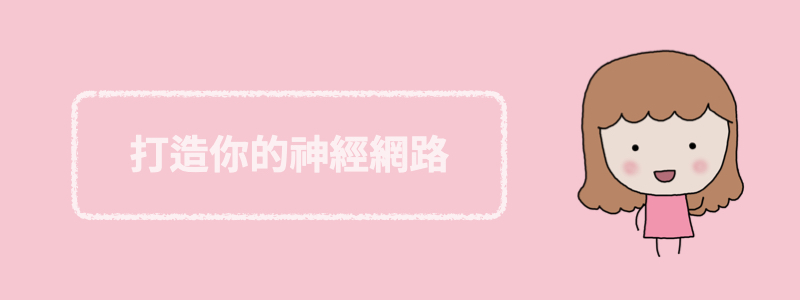

我們終於要開始做生命中第一個神經網路。要做的是 3 層深度學習, 因此請自行設第一層 N1 神經元, 第二層 N2, 第三層 N3

In [143]:
N1 = 20 # 神經元數量
N2 = 50
N3 = 40
N4 = 20 # N為隱藏層數量

## 1. 讀入套件

這裡我們讀入一些套件, 今天暫時不要理會細節。

In [144]:
!pip install gradio

In [145]:
%matplotlib inline
import seaborn as sns
import pandas as pd
# 標準數據分析、畫圖套件
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 神經網路方面
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 互動設計用
from ipywidgets import interact_manual

# 神速打造 web app 的 Gradio
import gradio as gr

## 2. 讀入 MNIST 數據庫

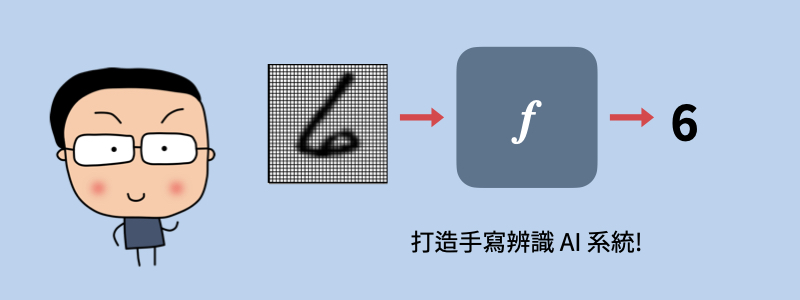

MNIST 是有一堆 0-9 的手寫數字圖庫。有 6 萬筆訓練資料, 1 萬筆測試資料。它是 "Modified" 版的 NIST 數據庫, 原來的版本有更多資料。這個 Modified 的版本是由 LeCun, Cortes, 及 Burges 等人做的。可以參考這個數據庫的[原始網頁](http://yann.lecun.com/exdb/mnist/)。

MNIST 可以說是 Deep Learning 最有名的範例, 它被 Deep Learning 大師 Hinton 稱為「機器學習的果蠅」。

### 2.1 由 Keras 讀入 MNIST

Keras 很貼心的幫我們準備好 MNIST 數據庫, 我們可以這樣讀進來 (第一次要花點時間)。

In [146]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

我們來看看訓練資料是不是 6 萬筆、測試資料是不是有 1 筆。

In [147]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料')
print(f'測試資料總筆數為 {len(x_test)} 筆資料')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [148]:
x_train.shape

(60000, 28, 28)

In [149]:
x_train[8740] # 可以查看目前數據樣式

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         12,  69, 225, 239,  81,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,
        181, 254, 254, 254, 250,  54,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 153,
        254, 254, 227, 213, 254, 208,   9,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 100, 253,
        254, 165,  34,  45, 254, 254,  24,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 232, 254,
        186,  25,   0,  53, 254, 254,  24,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149, 254, 194,
         36,   0,   0, 140, 254, 202,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 106,  32,
          0,   0,   0, 160, 254, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  36, 244, 254,  86,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  78, 254, 251,  59,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 132, 254, 227,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  18, 239, 254,  71,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 112, 254, 225,  17,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 140, 109,
         44, 135, 254, 158,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  11, 175, 253, 254, 254,
        254, 254, 252,  38,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  52, 254, 254, 254, 254,
        254, 254, 177,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 121, 254, 254,  65, 197,
        254, 254, 177,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 119, 254, 254, 211, 254,
        254, 254, 177,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25, 254, 254, 254, 254,
        254, 254, 198,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 130, 253, 254, 169,
        102, 235, 254, 239, 226, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  60,  62,  19,
          0,  70, 158, 194, 158,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

### 2.2 數據庫的內容

每筆輸入 (x) 就是一個手寫的 0-9 中一個數字的圖檔, 大小為 28x28。而輸出 (y) 當然就是「正確答案」。我們來看看編訓練資料的 x 輸入、輸出的部份分別長什麼樣子。

In [150]:
def show_xy(n=0):
    ax = plt.gca()
    X = x_train[n]
    plt.xticks([], [])
    plt.yticks([], [])
    plt.imshow(X, cmap = 'Greys')
    print(f'本資料 y 給定的答案為: {y_train[n]}')

## 秀出數據的樣子

In [151]:
interact_manual(show_xy, n=(0,59999));

interactive(children=(IntSlider(value=0, description='n', max=59999), Button(description='Run Interact', style…

In [152]:
def show_data(n = 100):
    X = x_train[n]
    print(X)

In [153]:
interact_manual(show_data, n=(0,59999));

interactive(children=(IntSlider(value=100, description='n', max=59999), Button(description='Run Interact', sty…

### 2.3 輸入格式整理

我們現在要用標準神經網路學學手寫辨識。原來的每筆數據是個 28x28 的矩陣 (array), 但標準神經網路只吃「平平的」, 也就是每次要 28x28=784 長的向量。因此我們要用 `reshape` 調校一下。

In [154]:
x_train = x_train.reshape(60000, 784)/255 #除255標準化，重新更變長度為784
x_test = x_test.reshape(10000, 784)/255

### 2.4 輸出格式整理
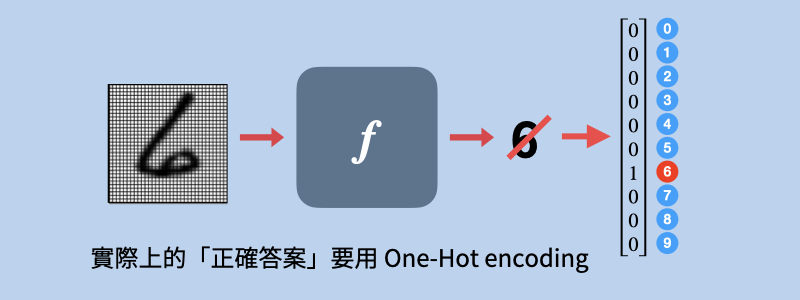

我們可能會想, 我們想學的函數是這樣的型式:

$$\hat{f} \colon \mathbb{R}^{784} \to \mathbb{R}$$

其實這樣不太好! 為什麼呢? 比如說我們的輸入 x 是一張 0 的圖, 因為我們訓練的神經網路總會有點誤差, 所以可能會得到:

$$\hat{f}(x) = 0.5$$

那這意思是有可能是 0, 也有可能是 1 嗎!!?? 可是 0 和 1 根本不像啊。換句話說分類的問題這樣做其實不合理!

於是我們會做 "1-hot enconding", 也就是

* 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
* 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0]

等等。因為分類問題基本上都要做這件事, Keras 其實已幫我們準備好套件!

In [155]:
y_train[1234] # 查看目前的 y_train

3

In [156]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [157]:
y_train[1234] #查看更變後 y_train

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

我們來看看剛剛某號數據的答案。

In [158]:
n = 87
y_train[n]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

和我們想的一樣! 至此我們可以打造我們的神經網路了。

## 3. 打造第一個神經網路

我們決定了我們的函數是

$$\hat{f} \colon \mathbb{R}^{784} \to \mathbb{R}^{10}$$

這個樣子。而我們又說第一次要用標準神網路試試, 所以我們只需要再決定要幾個隱藏層、每層要幾個神經元, 用哪個激發函數就可以了。

### 3.1 決定神經網路架構、讀入相關套件

假如我們要用 ReLU 當激發函數, 要設計神經網路, 只差要指定多少個隱藏層、每層多少個神經元就好了!

設計完了基本上就是告訴 TensorFlow, 我們的想法就可以了!

### 3.2 建構我們的神經網路

和以前做迴歸或機器學習一樣, 我們就打開個「函數學習機」。標準一層一層傳遞的神經網路叫 `Sequential`, 於是我們打開一個空的神經網路。

In [159]:
model = Sequential() # 可以更改model名稱

我們每次用 `add` 去加一層, 從第一個隱藏層開始。而第一個隱藏層因為 TensorFlow 當然猜不到輸入有 784 個 features, 所以我們要告訴它。

1. model.add(): 這個函式會將一個新的層新增到神經網路模型中。
2. Dense(): 這代表一個全連接層，也就是該層中的每個神經元都會與前一層的所有神經元連接。
3. N1: 這是該層神經元的數量，它是一個整數值，可以根據你的模型需求調整。
4. input_dim=784: 這是輸入層的維度，也就是輸入數據的特徵數量。在這裡，它被設定為 784，這通常表示輸入的是 28x28 像素的灰階圖像。
5. activation='relu': 這是激活函數，用於將神經元的輸出轉換成非線性值。不同的激活函數，例如 'sigmoid'、'tanh'、'softmax' 等。
  - 線性函數 (Linear)：
    > 公式：f(x) = x
    > 效果：直接輸出輸入值，沒有引入非線性。
    > 缺點：所有層的輸出都將是線性的，模型無法學習複雜的模式。
  - Sigmoid 函數
    > 公式：f(x) = 1 / (1 + exp(-x))
    > 效果：將輸入值壓縮到 0 到 1 之間，常用於二元分類問題。
    > 缺點：容易出現梯度消失問題，導致訓練速度變慢。
  - Tanh 函數 (Hyperbolic Tangent)
    > 公式：f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
    > 效果：將輸入值壓縮到 -1 到 1 之間，與 Sigmoid 函數類似，但輸出以 0 為中心。
    > 缺點：也容易出現梯度消失問題。
  - ReLU 函數 (Rectified Linear Unit)
    > 公式：f(x) = max(0, x)
    效果：當輸入值大於 0 時，直接輸出輸入值；當輸入值小於 0 時，輸出 0。
    優點：計算速度快，不容易出現梯度消失問題，是目前最常用的激活函數之一。
    缺點：當輸入值小於 0 時，神經元會失活，可能導致模型學習能力下降。
  - Leaky ReLU 函數
    > 公式：f(x) = max(0.01x, x)
    效果：與 ReLU 函數類似，但當輸入值小於 0 時，輸出一個很小的值，避免神經元完全失活。
  - Softmax 函數
    > 公式：f(x_i) = exp(x_i) / sum(exp(x_j))
    效果：將輸入值轉換成概率分布，常用於多分類問題。

In [160]:
model.add(Dense(N1, input_dim=784, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


第二層開始就不用再說明輸入神經元個數 (因為就是前一層神經元數)。

In [161]:
model.add(Dense(N2, activation='relu')) # 第二層

In [162]:
model.add(Dense(N3, activation='relu')) # 第三層

In [163]:
model.add(Dense(N4, activation='relu')) # 第四層

輸出有 10 個數字, 所以輸出層的神經元是 10 個! 而如果我們的網路輸出是

$$(y_1, y_2, \ldots, y_{10})$$

我們還希望

$$\sum_{i=1}^{10} y_i = 1$$

這可能嗎, 結果是很容易, 就用 `softmax` 當激發函數就可以!!

In [164]:
model.add(Dense(10, activation='softmax'))

至此我們的第一個神經網路就建好了!

### 3.3 組裝

和之前比較不一樣的是我們還要做 `compile` 才正式把我們的神經網路建好。你可以發現我們還需要做幾件事:

* 決定使用的 loss function, 一般是 `mse`
* 決定 optimizer, 我們用標準的 SGD
* 設 learning rate

為了一邊訓練一邊看到結果, 我們加設

    metrics=['accuracy']
    
本行基本上和我們的神經網路功能沒有什麼關係。

1. model.compile(): 這個函數用於配置模型的學習過程。
2. loss='mse': 這是損失函數，用於衡量模型預測值與實際值之間的差異。'mse' 代表均方誤差 (Mean Squared Error)，常用於回歸問題。
  - 回歸問題可以使用 'mse'、'mae' 等
  - 分類問題可以使用 'categorical_crossentropy'、'binary_crossentropy' 等。
3. optimizer=SGD(learning_rate=0.087): 這是優化器，用於更新模型的權重以最小化損失函數。這裡使用的是隨機梯度下降 (Stochastic Gradient Descent, SGD) 優化器，並設定學習率為 0.087。
  - 學習率通常在 0.001 到 0.1 之間。
  - 優化器種類
    1. 隨機梯度下降 (SGD)
      > 算法：每次迭代使用一小批數據 (mini-batch) 來計算梯度，並更新權重。
      優點：簡單易懂，計算成本低。
      缺點：收斂速度較慢，容易陷入局部最優解，對學習率敏感。
    2. 動量 (Momentum)
      > 算法：在 SGD 的基礎上，引入動量概念，使權重更新方向更加穩定。
      優點：收斂速度更快，更容易跳出局部最優解。
      缺點：需要額外的超參數 (動量係數)。
    3. Adagrad
      > 算法：根據每個參數的歷史梯度信息，自適應地調整學習率。
      優點：對於稀疏數據表現較好。
      缺點：學習率會單調遞減，可能導致訓練提前停止。
    4. RMSprop
      > 算法：在 Adagrad 的基礎上，解決學習率單調遞減的問題。
      優點：收斂速度更快，更穩定。
    5. Adam
    >  算法：結合了 Momentum 和 RMSprop 的優點。
    優點：收斂速度快，性能通常較好，是目前最常用的優化器之一。
    缺點：需要額外的超參數。
4. metrics=['accuracy']: 這是評估指標，用於衡量模型的性能。'accuracy' 代表準確率，常用於分類問題。
  - 回歸問題可以使用 'mse'、'mae' 等
  - 分類問題可以使用 'accuracy'、'precision'、'recall' 等

In [165]:
from tensorflow.keras.optimizers import Adam

In [166]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

## 4. 檢視我們的神經網路

我們可以檢視我們神經網路的架構, 可以確認一下是不是和我們想像的一樣。

### 4.1 看 model 的 summary

In [167]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 50)                  │           1,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 40)                  │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,820 (77.42 KB)

 Trainable params: 19,820 (77.42 KB)

 Non-trainable params: 0 (0.00 B)

很快算算參數數目和我們想像是否是一樣的!

## 5. 訓練你的第一個神經網路

恭喜! 我們完成了第一個神經網路。現在要訓練的時候, 你會發現不是像以前沒頭沒腦把訓練資料送進去就好。這裡我們還有兩件事要決定:

* 一次要訓練幾筆資料 (`batch_size`), 我們就 100 筆調一次參數好了
* 這 6 萬筆資料一共要訓練幾次 (`epochs`), 我們訓練個 10 次試試

於是最精彩的就來了。你要有等待的心理準備...

In [168]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6919 - loss: 0.9213
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9292 - loss: 0.2400
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9483 - loss: 0.1795
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9547 - loss: 0.1525
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9606 - loss: 0.1295
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9643 - loss: 0.1197
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9658 - loss: 0.1092
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1015
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0940
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0935


## 6. 試用我們的結果

我們來用比較炫的方式來看看可愛的神經網路學習成果。對指令有問題可以參考《少年Py的大冒險：成為Python數據分析達人的第一門課》。

In [169]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9427 - loss: 0.1913


In [170]:
print(f"測試資料正確率 {acc*100:.2f}%")

測試資料正確率 95.31%


我們 "predict" 放的是我們神經網路的學習結果。做完之後用 argmax 找到數值最大的那一項。

In [171]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [172]:
predict

array([7, 2, 1, ..., 4, 5, 6])

不要忘了我們的 `x_test` 每筆資料已經換成 784 維的向量, 我們要整型回 28x28 的矩陣才能當成圖形顯示出來!

In [173]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', predict[測試編號])

In [174]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總評量」。

In [175]:
score = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9427 - loss: 0.1913


In [176]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.1589910238981247
正確率 0.9531000256538391


### 7. 用 Gradio 來展示

In [177]:
def resize_image(inp):
    # 圖在 inp["layers"][0]
    image = np.array(inp["layers"][0], dtype=np.float32)
    image = image.astype(np.uint8)

    # 轉成 PIL 格式
    image_pil = Image.fromarray(image)

    # Alpha 通道設為白色, 再把圖從 RGBA 轉成 RGB
    background = Image.new("RGB", image_pil.size, (255, 255, 255))
    background.paste(image_pil, mask=image_pil.split()[3]) # 把圖片粘貼到白色背景上，使用透明通道作為遮罩
    image_pil = background

    # 轉換為灰階圖像
    image_gray = image_pil.convert("L")

    # 將灰階圖像縮放到 28x28, 轉回 numpy array
    img_array = np.array(image_gray.resize((28, 28), resample=Image.LANCZOS))

    # 配合 MNIST 數據集
    img_array = 255 - img_array

    # 拉平並縮放
    img_array = img_array.reshape(1, 784) / 255.0

    return img_array

In [178]:
def recognize_digit(inp):
    img_array = resize_image(inp)
    prediction = model.predict(img_array).flatten()
    labels = list('0123456789')
    return {labels[i]: float(prediction[i]) for i in range(10)}

In [179]:
iface = gr.Interface(
    fn=recognize_digit,
    inputs=gr.Sketchpad(),
    outputs=gr.Label(num_top_classes=3),
    title="MNIST 手寫辨識",
    description="請在畫板上繪製數字"
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a4e428cc019c1979e2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a4e428cc019c1979e2.gradio.live


## 結果

1. 使用四層神經網路，並且設置不同數量
  > 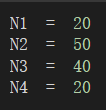

2. 調整模型訓練參數
```python
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
```
  - loss:採用較適用於分類任務的```categorical_crossentropy```
  - 優化器optimizer:改用Adam，並調整學習率為0.001
    > 學習率在0.055時，已有90%-93%的正確率
  - 相關的參數比較在[3.3的儲存格中](https://colab.research.google.com/drive/1TzO79i3L2a6uwfHgW-t3UAkhlnAhn_u0#scrollTo=5znBU0DV0Avo)


3. 模型的summary
  > 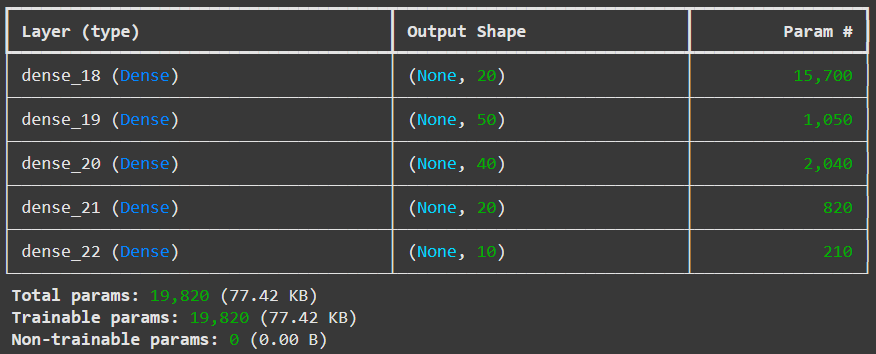

4. 準確率結果
  > 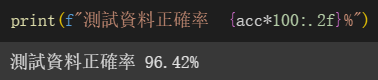

5. Gradio結果展示
- 1
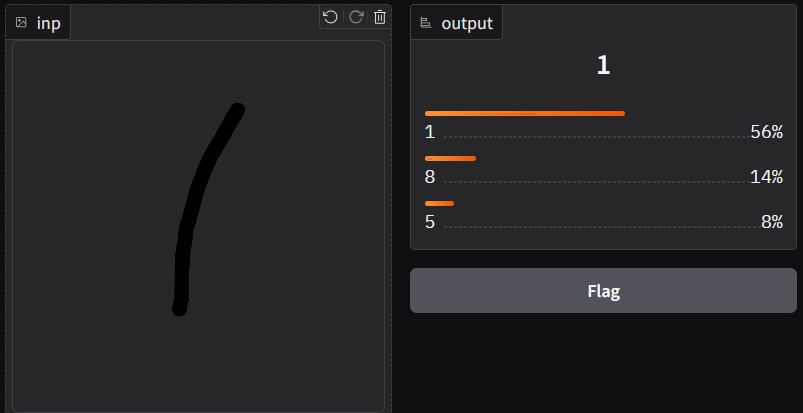
- 2
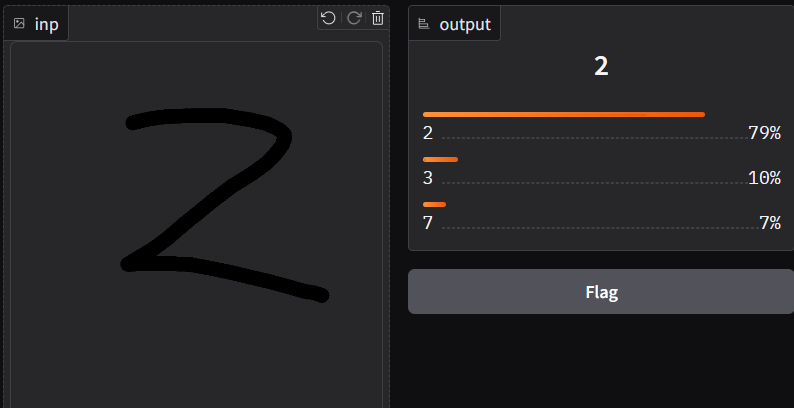
- 3
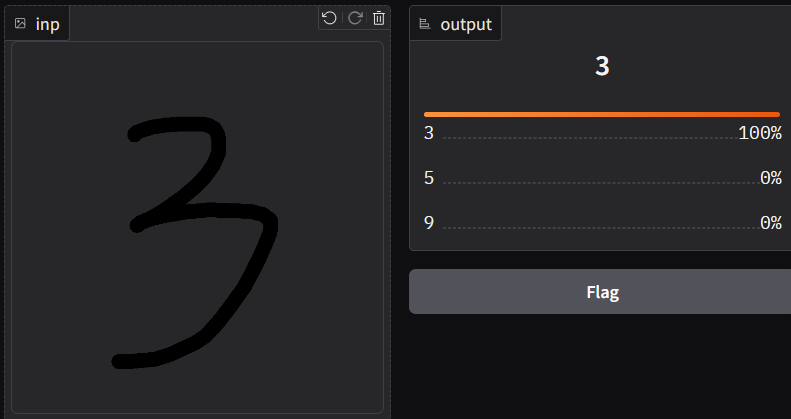
- 4
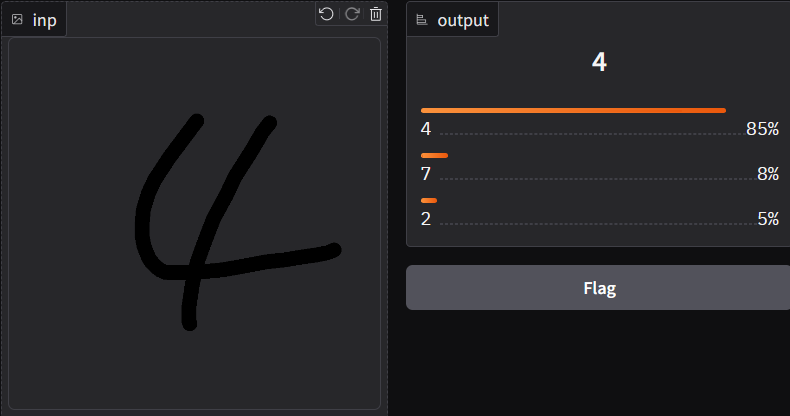
- 5
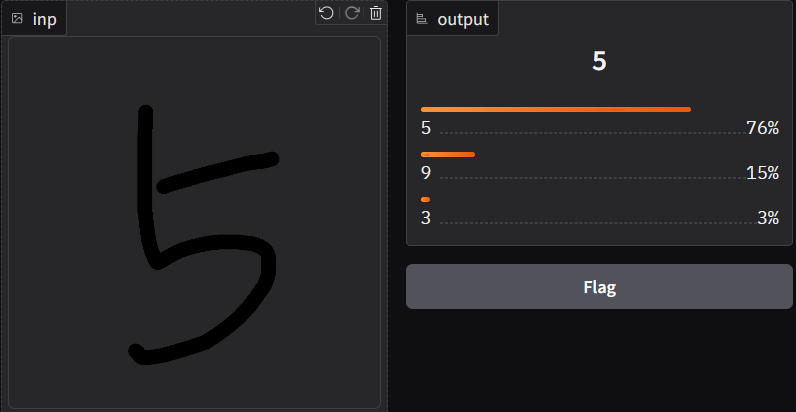
- 6
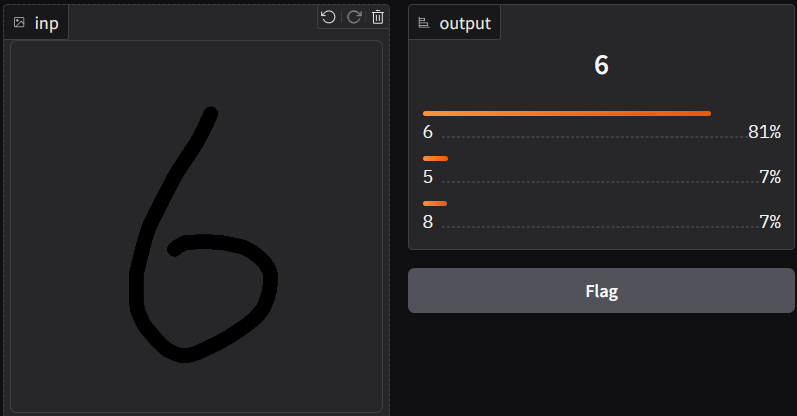
- 7
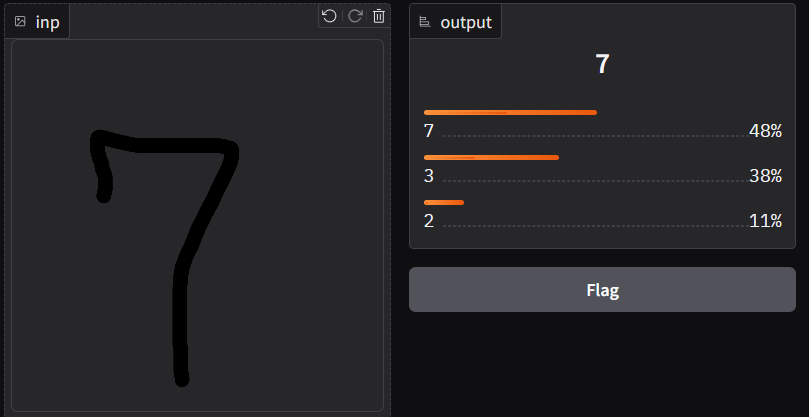
- 8
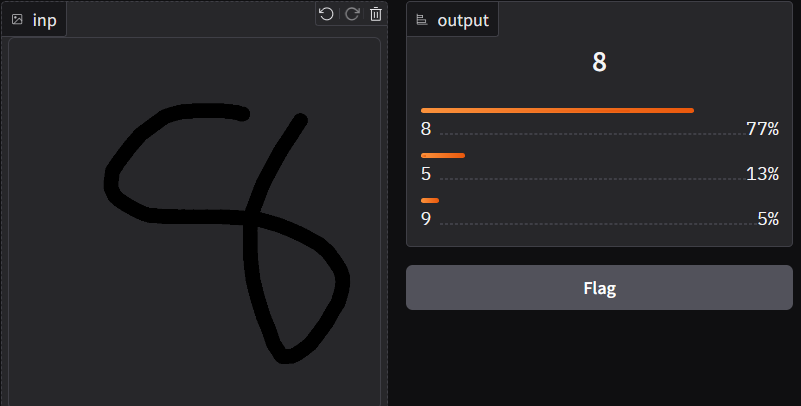
- 9
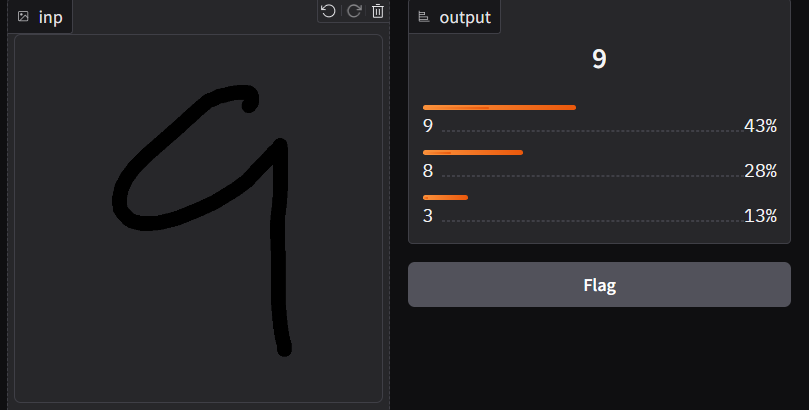
- 0
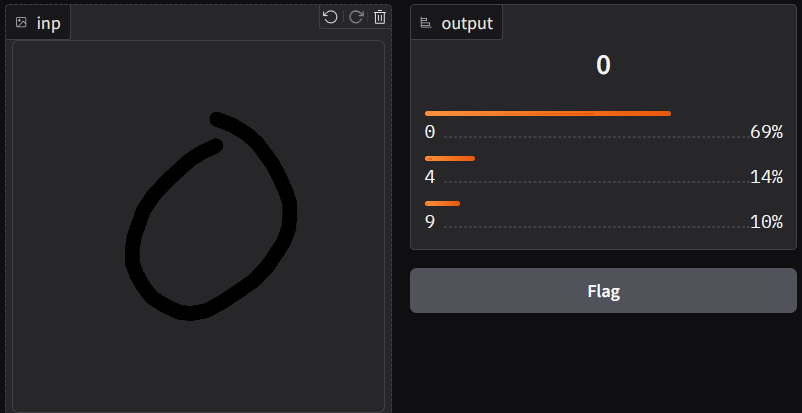

### 評分標準：

- 0分：程式連結無法順利開啟，且無截圖。
- 1分：程式開啟後只有匯入基本套件。
- 2分：程式連結無法順利開啟，但有部份截圖。
- 3分：GPT 水準或繳交作業與本周主題無關(若貼成別週作業也列在此。)
- 6分：作業繳交基本分，程式內容與課堂範例十分近似。例如僅更改其中一些數字。
- 8分：看的出來模型架構有大幅更改，但大致內容還是老師的範本。
- 10分：滿足上述作業說明。

> 註一：若沒有引入老師的固定4行套件，總分 -1。

> 註二：程式連結無法順利開啟包含 1.權限未開啟 2.繳交非colab連結的檔案 3.程式碼無法完整執行

> 註三：有請生成式AI幫忙的地方請特別說明，加上理解後的說明，並附上截圖(包括Prompt與生成結果)，不然都當抄襲AI。

> 註四：若認定抄襲，除該次作業0分外，總成績-10，再犯再扣，直至總成績扣完為止。
註五：若需要上傳的內容不多，請不要上傳PDF檔。